<a href="https://colab.research.google.com/github/fatymaNaseem/week-4-task/blob/main/week4_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

from google.colab import files

# Upload the file
uploaded = files.upload()

# Read the uploaded file into a DataFrame
data = pd.read_csv(next(iter(uploaded)))

# Display the first few rows of the DataFrame
print(data.head())

# Load the dataset
data = pd.read_csv('transaction_anomalies_dataset.csv')

# Check for null values
null_values = data.isnull().sum()
print("Null Values:\n", null_values)

# Get column info
column_info = data.info()

# Get descriptive statistics
descriptive_stats = data.describe()
print("Descriptive Statistics:\n", descriptive_stats)


Saving transaction_anomalies_dataset.csv to transaction_anomalies_dataset.csv
  Transaction_ID  Transaction_Amount  Transaction_Volume  \
0            TX0         1024.835708                   3   
1            TX1         1013.952065                   4   
2            TX2          970.956093                   1   
3            TX3         1040.822254                   2   
4            TX4          998.777241                   1   

   Average_Transaction_Amount  Frequency_of_Transactions  \
0                  997.234714                         12   
1                 1020.210306                          7   
2                  989.496604                          5   
3                  969.522480                         16   
4                 1007.111026                          7   

   Time_Since_Last_Transaction Day_of_Week Time_of_Day  Age  Gender   Income  \
0                           29      Friday        6:00   36    Male  1436074   
1                           22      Frid

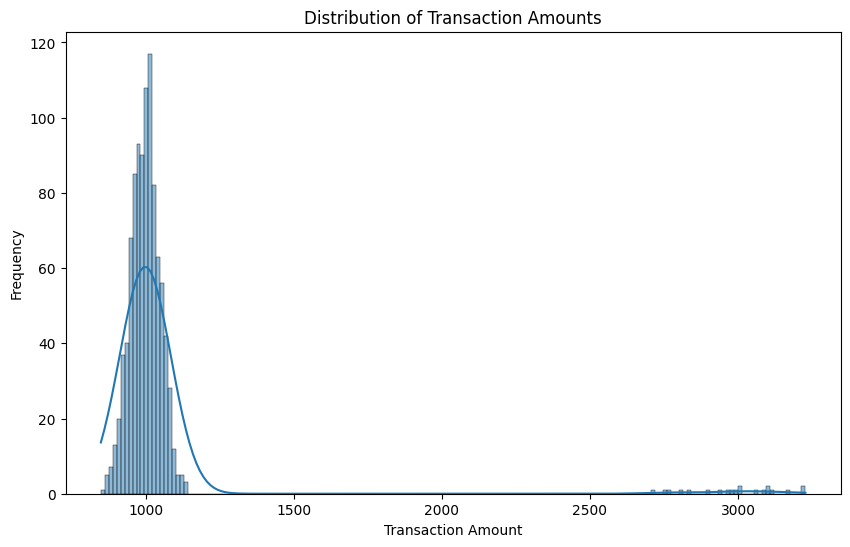

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of Transaction Amounts
plt.figure(figsize=(10, 6))
sns.histplot(data['Transaction_Amount'], kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()


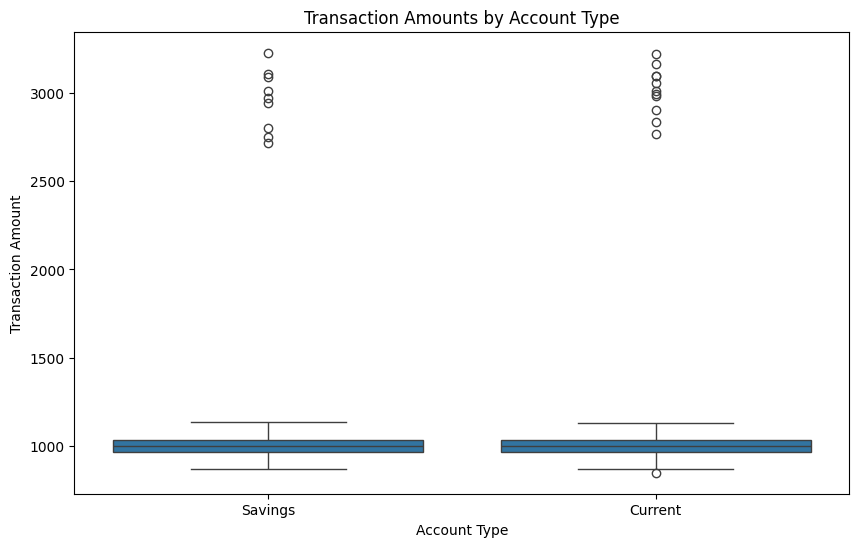

In [3]:
# Plot the distribution of Transaction Amounts by Account Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Account_Type', y='Transaction_Amount', data=data)
plt.title('Transaction Amounts by Account Type')
plt.xlabel('Account Type')
plt.ylabel('Transaction Amount')
plt.show()


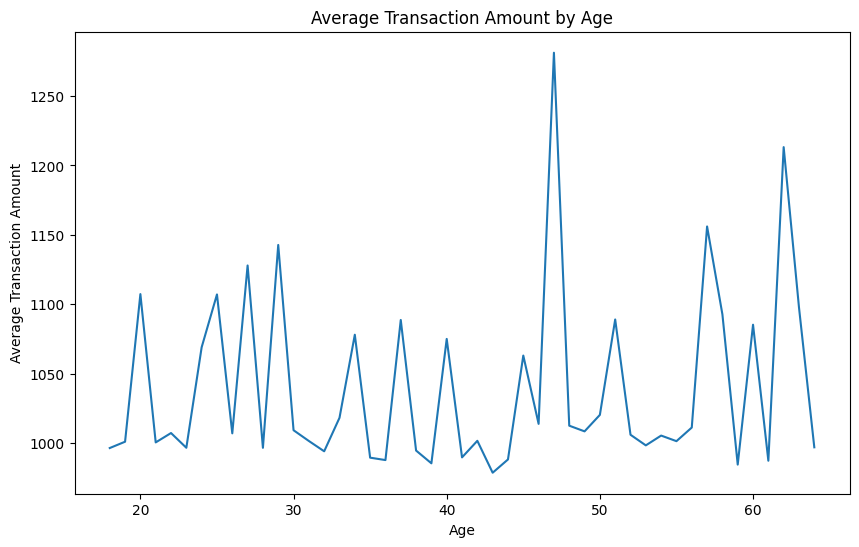

In [4]:
# Calculate and plot the average transaction amount by age
average_by_age = data.groupby('Age')['Transaction_Amount'].mean()

plt.figure(figsize=(10, 6))
average_by_age.plot(kind='line')
plt.title('Average Transaction Amount by Age')
plt.xlabel('Age')
plt.ylabel('Average Transaction Amount')
plt.show()


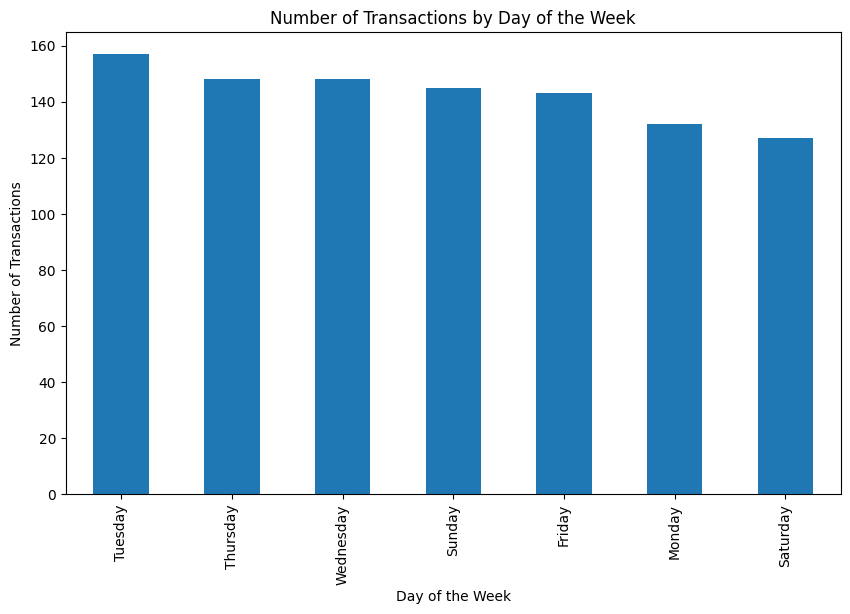

In [5]:
# Count the number of transactions by Day of the Week
transactions_by_day = data['Day_of_Week'].value_counts()

plt.figure(figsize=(10, 6))
transactions_by_day.plot(kind='bar')
plt.title('Number of Transactions by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Transactions')
plt.show()


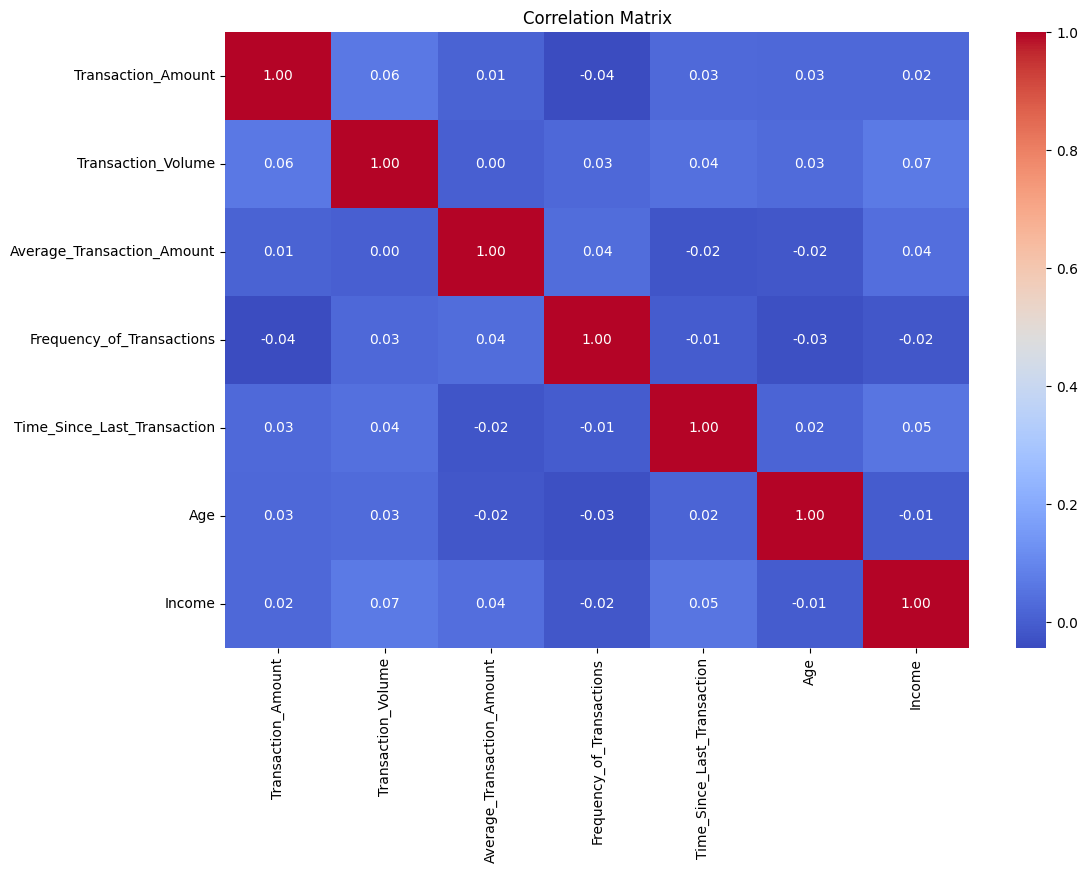

In [7]:
# Select only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


Anomalies count:
 Anomaly
 1    950
-1     50
Name: count, dtype: int64


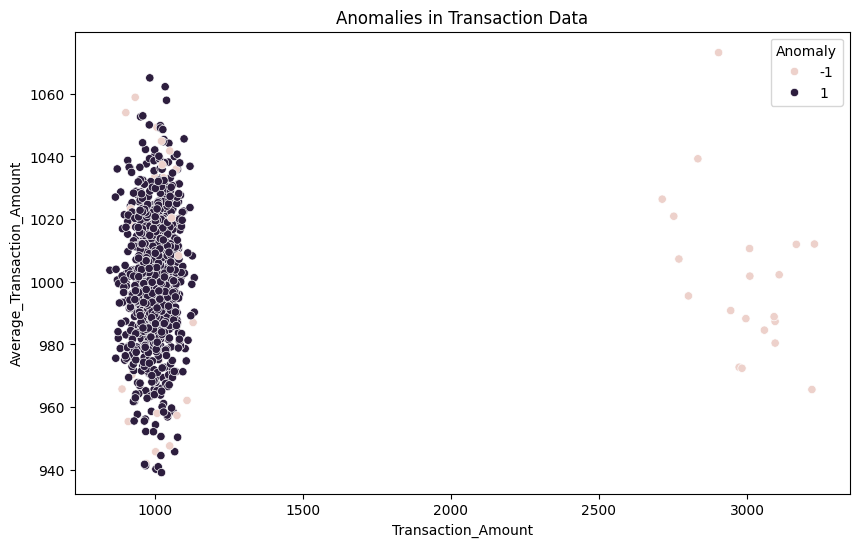

In [9]:
from sklearn.ensemble import IsolationForest

# Select relevant numeric features for the model
features = data[['Transaction_Amount',
                 'Transaction_Volume',
                 'Average_Transaction_Amount',
                 'Frequency_of_Transactions',
                 'Time_Since_Last_Transaction',
                 'Age',
                 'Income']]

# Initialize the Isolation Forest model
iso_forest = IsolationForest(contamination=0.05, random_state=42)

# Fit the model to the features
data['Anomaly'] = iso_forest.fit_predict(features)

# Count the number of anomalies
anomalies = data['Anomaly'].value_counts()
print("Anomalies count:\n", anomalies)

# Visualize anomalies
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Transaction_Amount', y='Average_Transaction_Amount', hue='Anomaly', data=data)
plt.title('Anomalies in Transaction Data')
plt.show()
